In [328]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions


In [329]:
v = pd.DataFrame()

In [330]:
v["x1"] = [1,2,3,4,5,6,6,7,9,9]
v["x2"] = [5,3,6,8,1,9,5,8,9,2]
v["label"] = [1,1,0,1,0,1,0,1,0,0]

In [331]:
 v

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

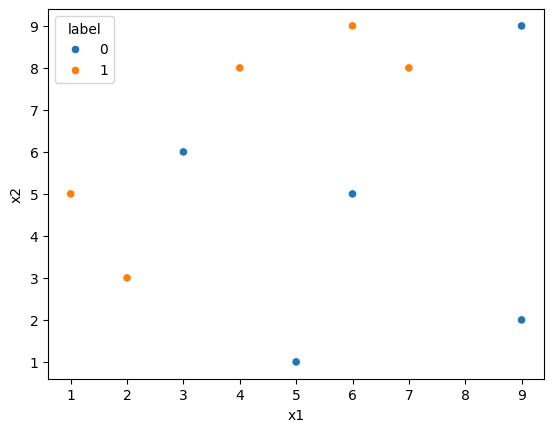

In [332]:
import seaborn as sns
sns.scatterplot(x = v["x1"] , y = v["x2"] , hue = v["label"])

In [333]:

v["weights"] = 1/v.shape[0]


In [334]:
v

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [337]:
x = v.iloc[: ,0:2].values
y = v.iloc[: ,2].values

In [338]:
# step 2  - Train 1st model
dt1.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

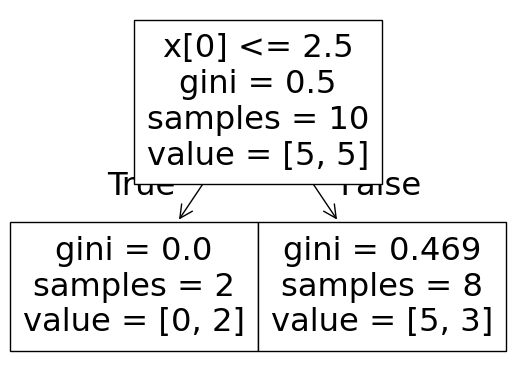

In [339]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

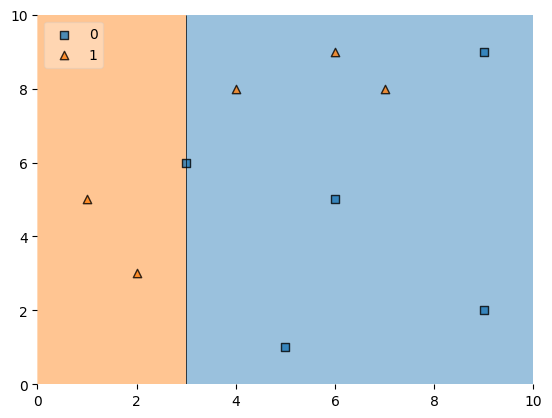

In [340]:
plot_decision_regions(x,y ,clf = dt1 , legend = 2)

In [341]:
v["y_pred"] = dt1.predict(x)

In [342]:
v
# we could see that there is eroor in 3
# and 5 th row

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [343]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [344]:


# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [345]:

# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
    # here if it is correctly classified then weight will be decreased
  else:
    return row['weights'] * np.exp(alpha)
    # if incorrectly classified then weight will be incresed


In [346]:


v['updated_weights'] = v.apply(update_row_weights,axis=1)


In [347]:
v
# here we can se my updated weight

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [348]:


v['updated_weights'].sum()
 # the sum of  updated weight

np.float64(0.9165153319682015)

In [349]:


v['nomalized_weights'] = v['updated_weights']/v['updated_weights'].sum()

# here we are multiplied the updated weights
#  to the sum of the updated weights to bring
# the sum equal to the  1

In [350]:

v

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [351]:

v['nomalized_weights'].sum()
# now we could see that our normalised weights is equal to the 1

np.float64(1.0)

In [352]:

v['cumsum_upper'] = np.cumsum(v['nomalized_weights'])

# here we are making the upper range

In [353]:


v['cumsum_lower'] = v['cumsum_upper'] - v['nomalized_weights']
# here we are making the lower range

In [354]:
v[['x1','x2','label','weights','y_pred','updated_weights',
   'cumsum_lower','cumsum_upper']]

     #

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [355]:


def create_new_dataset(v):

  indices = []

  for i in range(v.shape[0]):
    a = np.random.random()
    for index,row in v.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
   #  here we are making new datset
   # by generating 10 numbers between 0 to 9
   # and then we will try to match in which range the digits is falling

In [356]:

index_values = create_new_dataset(v)

index_values
# our random generating digits
# now  we will match to our ranges

# here we could see 8 coming three times ,
# 6 coming two times
# others coming single times


[4, 9, 5, 6, 0, 5, 8, 7, 5, 4]

In [357]:

second_v = v.iloc[index_values,[0,1,2,3]]
# probably  those digits  falls in these
# rows

# now by using only these  columns we are making new dataset
# whom only these rows will be used to train the model

In [358]:

# new datset
second_v

,x1,x2,label,weights
4,5,1,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1


In [359]:


dt2 = DecisionTreeClassifier(max_depth=1)

In [360]:


x = second_v.iloc[:,0:2].values
y = second_v.iloc[:,2].values


In [361]:

 #  training  our 2nd model

dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 3.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.625, 0.5, '  False')]

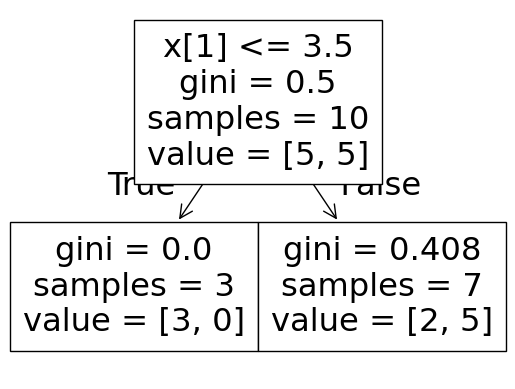

In [362]:
# here we have plotted the tree

plot_tree(dt2)

<Axes: >

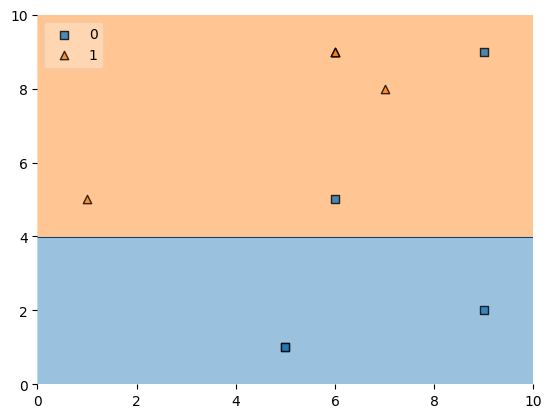

In [363]:
# 2 nd model decision regions
plot_decision_regions(x, y, clf=dt2, legend = 2)


In [364]:
second_v['y_pred'] = dt2.predict(x)
# the prediction of second model


In [365]:
# we could see  here y predictions
second_v

,x1,x2,label,weights,y_pred
4,5,1,0,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0


In [366]:
# finding the final weight
alpha2 = calculate_model_weight(0.1)

In [367]:

alpha2
# our second model weight


np.float64(1.0986122886681098)

In [368]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [369]:
second_v['updated_weights'] = second_v.apply(update_row_weights,axis=1)

In [370]:


second_v

,x1,x2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
6,6,5,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622


In [371]:
second_v['nomalized_weights'] = second_v['updated_weights']/second_v['updated_weights'].sum()


In [372]:


second_v

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,1,0.297427,0.344313
0,1,5,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,1,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922


In [373]:


second_v['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [374]:

second_v['cumsum_upper'] = np.cumsum(second_v['nomalized_weights'])

In [375]:

second_v['cumsum_lower'] = second_v['cumsum_upper'] - second_v['nomalized_weights']

In [376]:
second_v[['x1','x2','label','weights','y_pred',
'nomalized_weights','cumsum_lower','cumsum_upper']]


,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.038922,0.000000,0.038922
9,9,2,0,0.1,0,0.038922,0.038922,0.077843
5,6,9,1,0.1,1,0.038922,0.077843,0.116765
6,6,5,0,0.1,1,0.344313,0.116765,0.461078
0,1,5,1,0.1,1,0.038922,0.461078,0.500000
5,6,9,1,0.1,1,0.038922,0.500000,0.538922
8,9,9,0,0.1,1,0.344313,0.538922,0.883235
7,7,8,1,0.1,1,0.038922,0.883235,0.922157
5,6,9,1,0.1,1,0.038922,0.922157,0.961078
4,5,1,0,0.1,0,0.038922,0.961078,1.000000


In [377]:


index_values = create_new_dataset(second_v)

In [378]:


third_v= second_v.iloc[index_values,[0,1,2,3]]

In [379]:


third_v

,x1,x2,label,weights
7,7,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1


In [380]:

dt3 = DecisionTreeClassifier(max_depth=1)

In [381]:
x = second_v.iloc[:,0:2].values
y = second_v.iloc[:,2].values

In [382]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

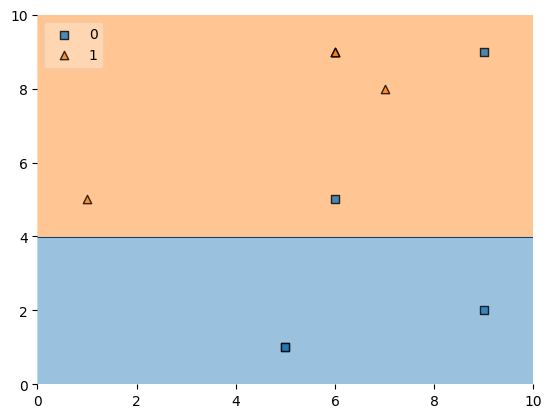

In [383]:


plot_decision_regions(x, y, clf=dt3, legend=2)

In [384]:

third_v['y_pred'] = dt3.predict(x)


In [385]:

third_v
# seven times  it is  doing the mistake

,x1,x2,label,weights,y_pred
7,7,8,1,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,0


In [386]:

alpha3 = calculate_model_weight(0.7)


In [387]:
alpha3

# model is doing quite much mistakes so here its weights
# is negative too

np.float64(-0.4236489301936017)

In [388]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


**predictions**

In [389]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
# from 1st model we gave input and it predicted 1


array([1])

In [390]:
dt2.predict(query)

array([1])

In [391]:
dt3.predict(query)

array([1])

In [394]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [395]:
np.sign(1.09)

np.float64(1.0)

In [399]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)


array([0])

In [400]:
dt2.predict(query)

array([1])

In [401]:
dt3.predict(query)

array([1])

In [403]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [405]:
np.sign(-0.25)

np.float64(-1.0)